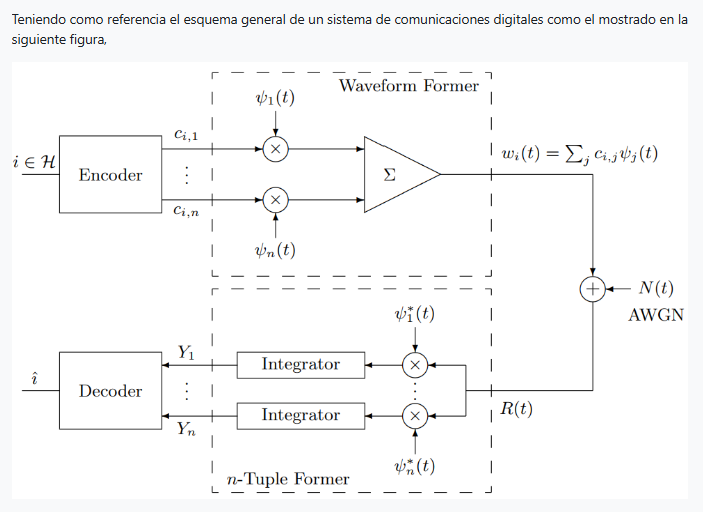
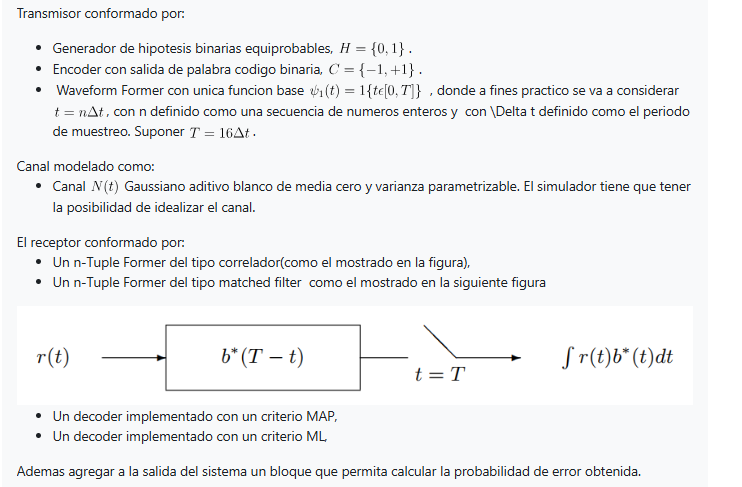

6e-05


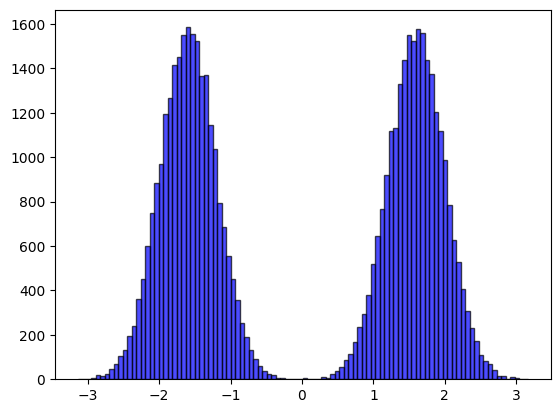

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def hypo_Code(intentos = 50000):
    """
    Genera una secuencia binaria aleatoria de longitud 'intentos' y la codifica según la regla:
    - Si el bit es 0, se codifica como -1.
    - Si el bit es 1, se codifica como 1.
    
    Retorna:
    - H (ndarray): La secuencia binaria aleatoria generada.
    - C (ndarray): La secuencia codificada según la regla mencionada.
    """
    H = np.random.randint(0,2,intentos)
    C = [-1 if H[n] == 0 else 1 for n in range(len(H))]
    return H,C

def fbase(delta = .1):
    """
    Genera una función base rectangular de duración 16*delta.
    
    Parámetros:
    - delta (float): El intervalo de muestreo de la función base.
    """
    T = 16*delta
    t = np.arange(0,T,delta)
    psi = []
    for n in range(len(t)):
        if(t[n]>= 0 and t[n] < T):
            psi.append(1)
        else:
            psi.append(0)
    return psi

def canal(C,psi):
    """
    Aplica la función base psi a la secuencia codificada C para obtener la señal transmitida.
    """
    w = []
    npsi = [-1 for n in range(len(psi))]
    for n in range(len(C)):
        if(C[n] == 1): 
            w.append(psi)
        else:
            w.append(npsi)
    #Se hace que la lista de listas sea una sola lista
    arreglado = [item for sublist in w for item in sublist] 
    return arreglado

def ruido(W,ruidoso = True):
    """
    Agrega ruido a la señal transmitida. Puede ser que el canal no sea ruidoso.
    """
    R = np.zeros(len(W))
    if(ruidoso == True):
        Z = np.random.normal(0,1,len(W))
        for n in range(len(W)):
            R[n] = W[n] + Z[n]
    else: R = W
    return R

def correlador(N,psi,delta = .1):
    """
    Realiza la correlación entre la señal recibida y la función base psi.
    """
    t = np.arange(0,len(N)*delta,delta)
    corr = 0
    p_puntos = []
    for n in range(int(len(N)/len(psi))):
        for nn in range(len(psi)):
            corr += N[nn+n*len(psi)]*psi[nn]
        p_puntos.append(corr*delta)
        corr = 0
    return p_puntos
    
def Y_Deco(R):
    """
    Realiza la detección de la señal recibida R y devuelve la secuencia binaria detectada.
    """
    #Calculando se pudo ver que el nivel de decisión es 0
    N_decision = 0
    Y = [0 if R[n] < N_decision else 1 for n in range(len(R))]
    return Y

def error(H,Y):
    """
    Calcula la tasa de error entre la secuencia original y la secuencia detectada.
    """
    error = 0
    for n in range(len(H)):
        if(H[n] != Y[n]):
            error += 1
    return error/len(H)


H,C = hypo_Code()
psi = fbase()
W = canal(C,psi)
N = ruido(W,True) # Esta funcion con el true/false decide si tiene ruido o no
R = correlador(N,psi)
Y = Y_Deco(R)

plt.hist(R, bins = 100, color = 'blue', edgecolor = 'black', alpha = 0.7)
print(error(H,Y))
plt.show()